<a href="https://colab.research.google.com/github/mgoncerz/ml_zaliczenie_projekt/blob/master/projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The idea is to compare the accuracy of various ML methods in reckognizing handwritten letters from alphabets of different complexity.

Loading libraries:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from matplotlib.font_manager import FontProperties

import pandas as pd

import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, adam
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras.utils.vis_utils import plot_model
from IPython.display import Image 

from sklearn.decomposition import PCA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


Hiragana:

1. Loading data (https://www.kaggle.com/anokas/kuzushiji):

In [0]:
images_train = np.load('kmnist-train-imgs.npz')['arr_0']
images_test = np.load('kmnist-test-imgs.npz')['arr_0']

data_length = images_train[0].shape[0] * images_train[0].shape[1]

x_train = images_train.reshape(len(images_train), data_length).astype('float32')
x_test = images_test.reshape(len(images_test), data_length).astype('float32')

labels_train = np.load('kmnist-train-labels.npz')['arr_0']
labels_test = np.load('kmnist-test-labels.npz')['arr_0']

labels_map = pd.read_csv("kmnist_classmap.csv", encoding="utf-8")

2. Input data analysis:

   index codepoint char
0      0    U+304A    お
1      1    U+304D    き
2      2    U+3059    す
3      3    U+3064    つ
4      4    U+306A    な
5      5    U+306F    は
6      6    U+307E    ま
7      7    U+3084    や
8      8    U+308C    れ
9      9    U+3092    を


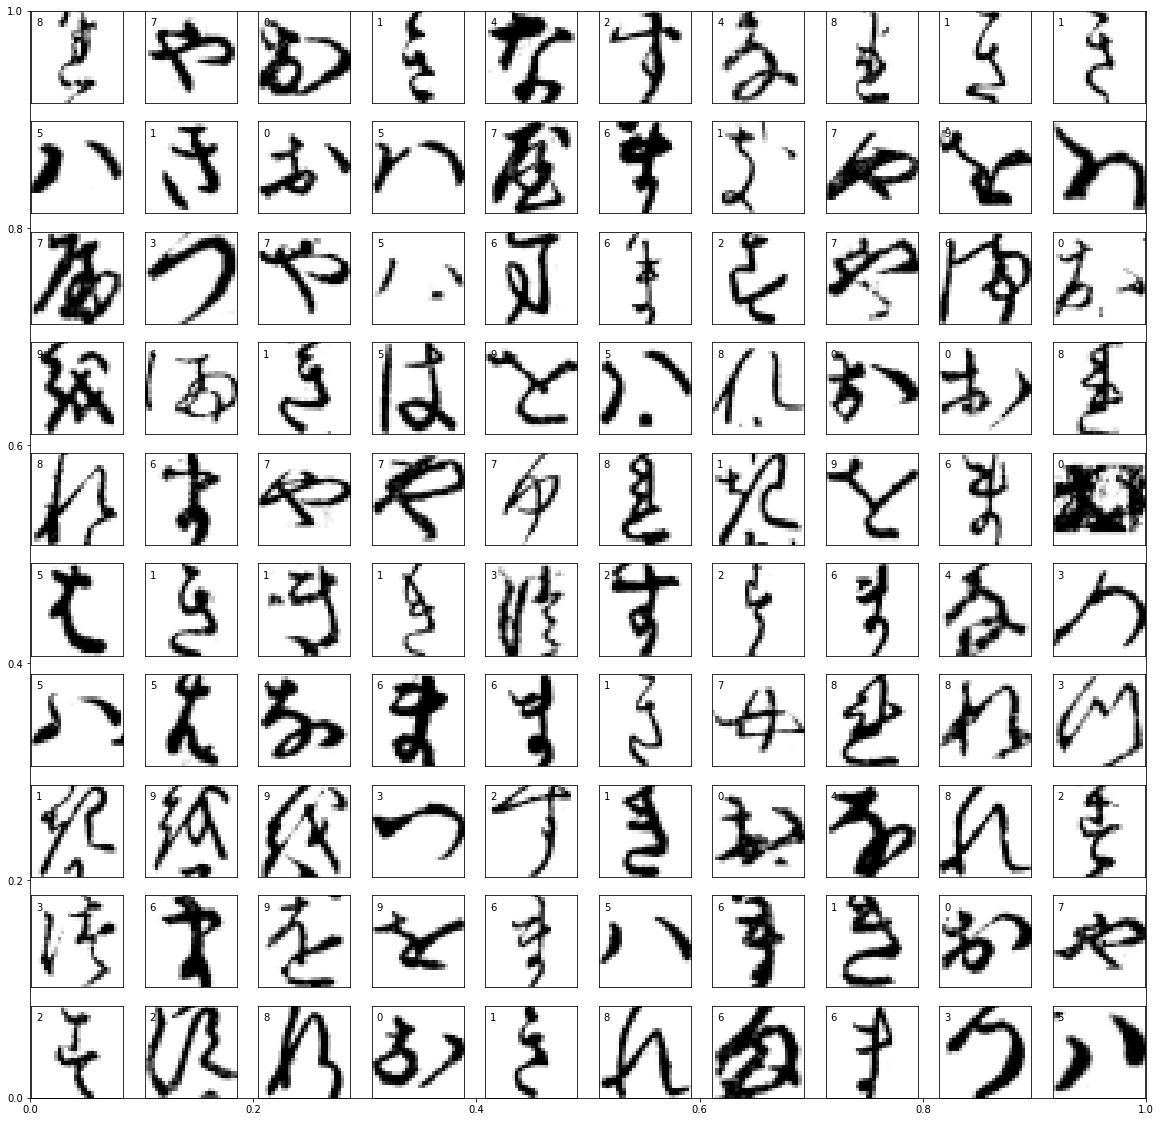

In [4]:
print(labels_map)

fig, axes = plt.subplots(figsize=(20,20))

for i in range(100):
  ax = fig.add_subplot(10,10,i+1,xticks=[], yticks=[])
  ax.imshow(images_train[i], cmap=plt.cm.binary, interpolation='nearest')
  ax.text(1, 4, str(labels_train[i]))

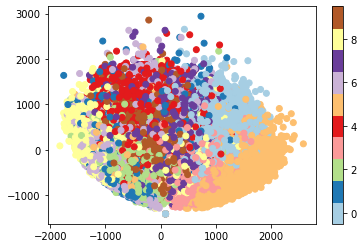

In [5]:
projection = PCA(n_components=2).fit_transform(x_train)
plt.scatter(projection[:, 0], projection[:, 1], c=labels_train.astype(int), cmap=plt.get_cmap('Paired', 10), vmin=-0.5, vmax=9.5)
plt.colorbar()

3. Simple approach (Fisher):



Fisher:
Score:  0.5856
              precision    recall  f1-score   support

           0       0.86      0.61      0.72      1000
           1       0.54      0.62      0.58      1000
           2       0.38      0.65      0.48      1000
           3       0.79      0.61      0.69      1000
           4       0.58      0.60      0.59      1000
           5       0.65      0.45      0.53      1000
           6       0.60      0.69      0.64      1000
           7       0.75      0.43      0.55      1000
           8       0.48      0.67      0.56      1000
           9       0.65      0.52      0.58      1000

    accuracy                           0.59     10000
   macro avg       0.63      0.59      0.59     10000
weighted avg       0.63      0.59      0.59     10000



Text(0.5, 1.0, 'Fisher confusion matrix')

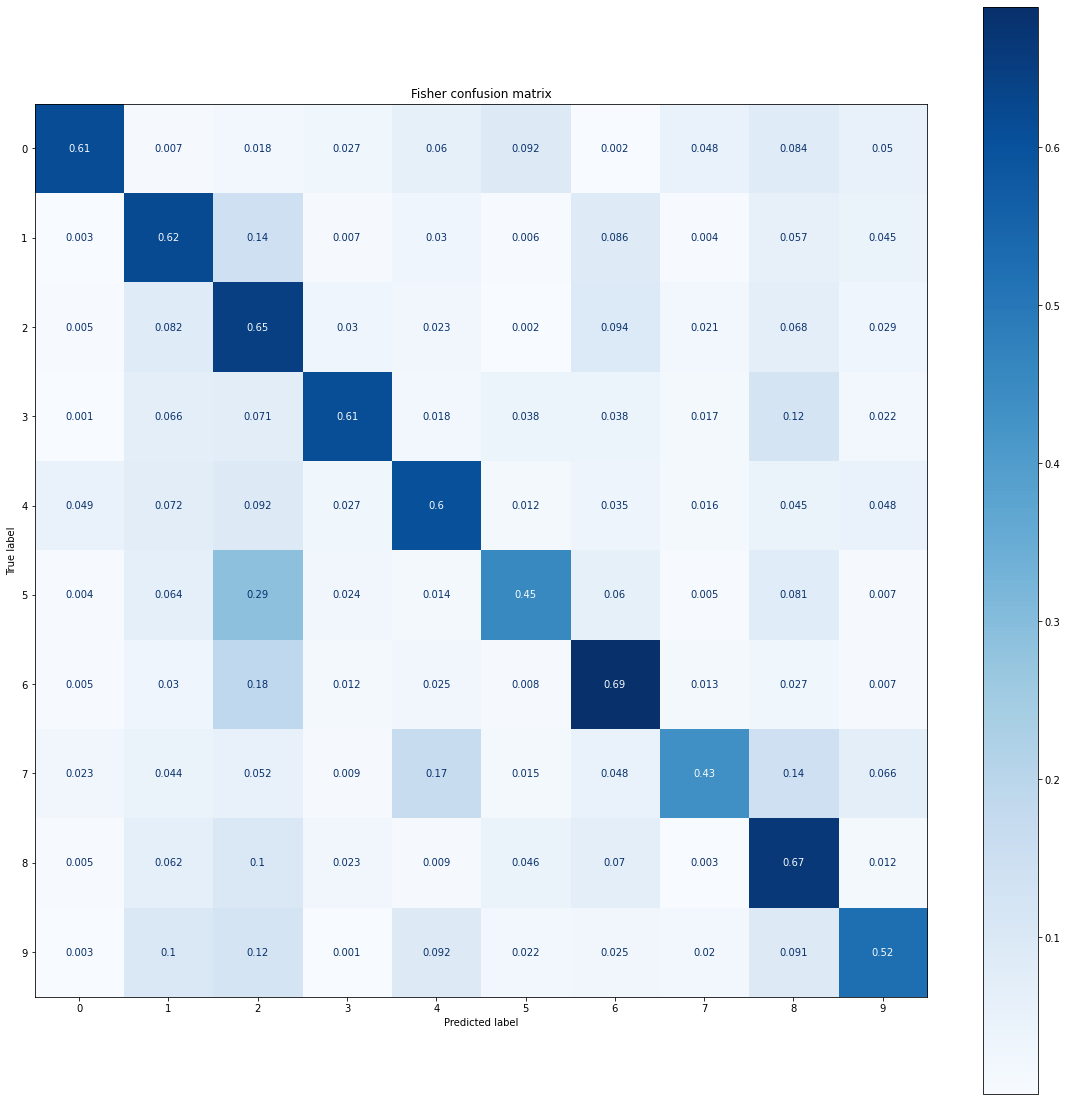

In [6]:
print("Fisher:")
f_model = LinearDiscriminantAnalysis()
f_model.fit(x_train, labels_train) #note this takes labels as single numbers per input element, not transformed to dij form
f_prediction = f_model.predict(x_test)

print("Score: ", f_model.score(x_test, labels_test))

fig, axes = plt.subplots(figsize=(20,20))

print(metrics.classification_report(labels_test, f_prediction))

f_cfm = metrics.plot_confusion_matrix(f_model, x_test, labels_test, cmap=plt.cm.Blues, normalize = "true", ax = axes)
f_cfm.ax_.set_title("Fisher confusion matrix")


4. k-neighbours

k-neighbors:
Score:  0.9121
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1000
           1       0.90      0.92      0.91      1000
           2       0.83      0.88      0.85      1000
           3       0.90      0.96      0.93      1000
           4       0.96      0.88      0.92      1000
           5       0.93      0.92      0.92      1000
           6       0.91      0.93      0.92      1000
           7       0.98      0.89      0.93      1000
           8       0.88      0.94      0.91      1000
           9       0.97      0.89      0.93      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



Text(0.5, 1.0, 'k-neighbors confusion matrix')

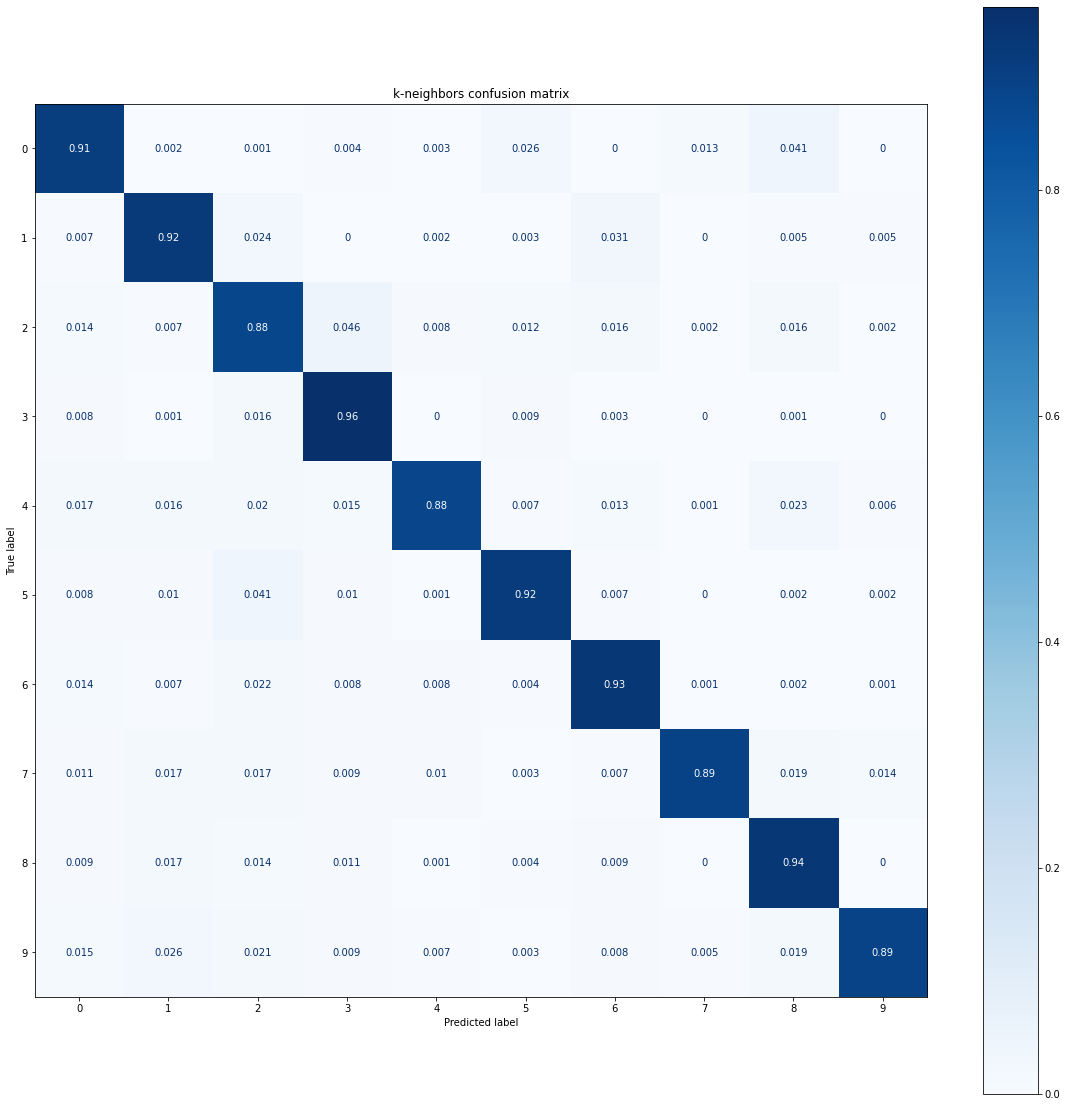

In [7]:
print("k-neighbors:")
kneighbors_model = KNeighborsClassifier(3)
kneighbors_model.fit(x_train, labels_train) #note this takes labels as single numbers per input element, not transformed to dij form
kneighbors_prediction = kneighbors_model.predict(x_test)

print("Score: ", kneighbors_model.score(x_test, labels_test))

fig, axes = plt.subplots(figsize=(20,20))

print(metrics.classification_report(labels_test, kneighbors_prediction))

f_cfm = metrics.plot_confusion_matrix(kneighbors_model, x_test, labels_test, cmap=plt.cm.Blues, normalize = "true", ax = axes)
f_cfm.ax_.set_title("k-neighbors confusion matrix")

5. Boosted Decision Trees (AdaBoost)

AdaBoost:
Score:  0.7526
              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1000
           1       0.79      0.71      0.75      1000
           2       0.62      0.76      0.68      1000
           3       0.79      0.83      0.81      1000
           4       0.79      0.70      0.74      1000
           5       0.83      0.78      0.80      1000
           6       0.82      0.76      0.78      1000
           7       0.76      0.68      0.72      1000
           8       0.68      0.78      0.73      1000
           9       0.71      0.77      0.74      1000

    accuracy                           0.75     10000
   macro avg       0.76      0.75      0.75     10000
weighted avg       0.76      0.75      0.75     10000



Text(0.5, 1.0, 'AdaBoost confusion matrix')

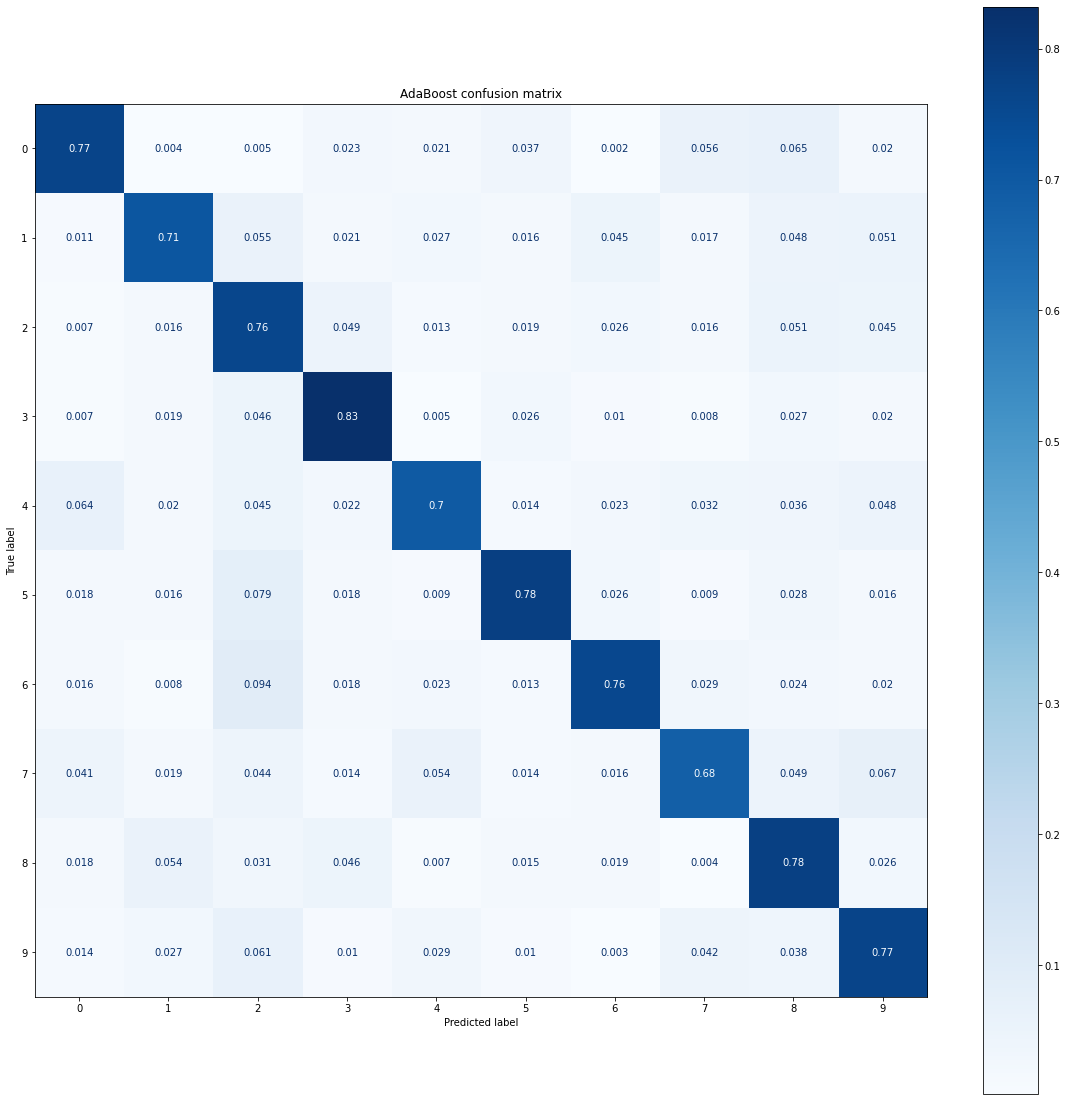

In [8]:
print("AdaBoost:")

adaboost_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=60),n_estimators=10)

adaboost_model.fit(x_train, labels_train) #note this takes labels as single numbers per input element, not transformed to dij form
adaboost_prediction = adaboost_model.predict(x_test)

print("Score: ", adaboost_model.score(x_test, labels_test))

fig, axes = plt.subplots(figsize=(20,20))

print(metrics.classification_report(labels_test, adaboost_prediction))

adaboost_cfm = metrics.plot_confusion_matrix(adaboost_model, x_test, labels_test, cmap=plt.cm.Blues, normalize = "true", ax = axes)
adaboost_cfm.ax_.set_title("AdaBoost confusion matrix")


6. Simple Neural Network

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dropout_1 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 784)               615440    
_________________________________________________________________
dropout_2 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                7850      
Total params: 1,238,730
Trainable params: 1,238,730
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12

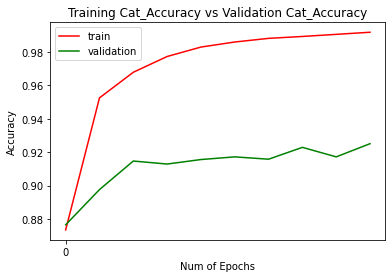

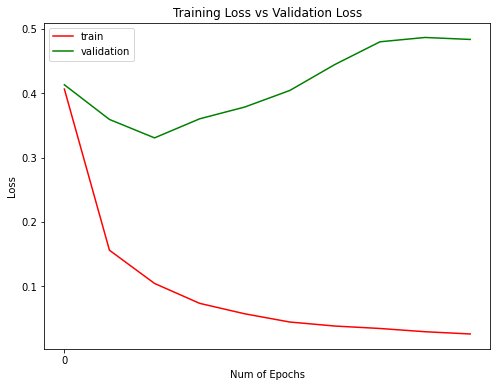

In [9]:
x_train_normalized = x_train / 255
x_test_normalized = x_test / 255

y_train = keras.utils.to_categorical(labels_train, 10)
y_test = keras.utils.to_categorical(labels_test, 10)

snn_model = Sequential()
snn_model.add(Dense(data_length, activation='relu', input_shape=(data_length,)))
snn_model.add(Dropout(0.2))
snn_model.add(Dense(data_length, activation='relu'))
snn_model.add(Dropout(0.2))
snn_model.add(Dense(10, activation='softmax'))

snn_model.summary()

snn_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

n_epochs = 10
snn_history = snn_model.fit(x_train_normalized, y_train, batch_size=200, epochs=n_epochs, verbose=True, validation_data=(x_test_normalized, y_test))
print(snn_model.evaluate(x_test_normalized, y_test))

plt.figure(0)
plt.plot(snn_history.history['accuracy'], 'r')
plt.plot(snn_history.history['val_accuracy'],'g')
plt.xticks(np.arange(0, n_epochs, 10.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Cat_Accuracy vs Validation Cat_Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(snn_history.history['loss'],'r')
plt.plot(snn_history.history['val_loss'],'g')
plt.xticks(np.arange(0, n_epochs, 10.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()


              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1000
           1       0.96      0.90      0.93      1000
           2       0.85      0.90      0.87      1000
           3       0.91      0.95      0.93      1000
           4       0.92      0.91      0.91      1000
           5       0.97      0.91      0.94      1000
           6       0.90      0.94      0.92      1000
           7       0.95      0.93      0.94      1000
           8       0.96      0.92      0.94      1000
           9       0.95      0.92      0.93      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



Text(0.5, 1.0, 'Simple Neural Network confusion matrix')

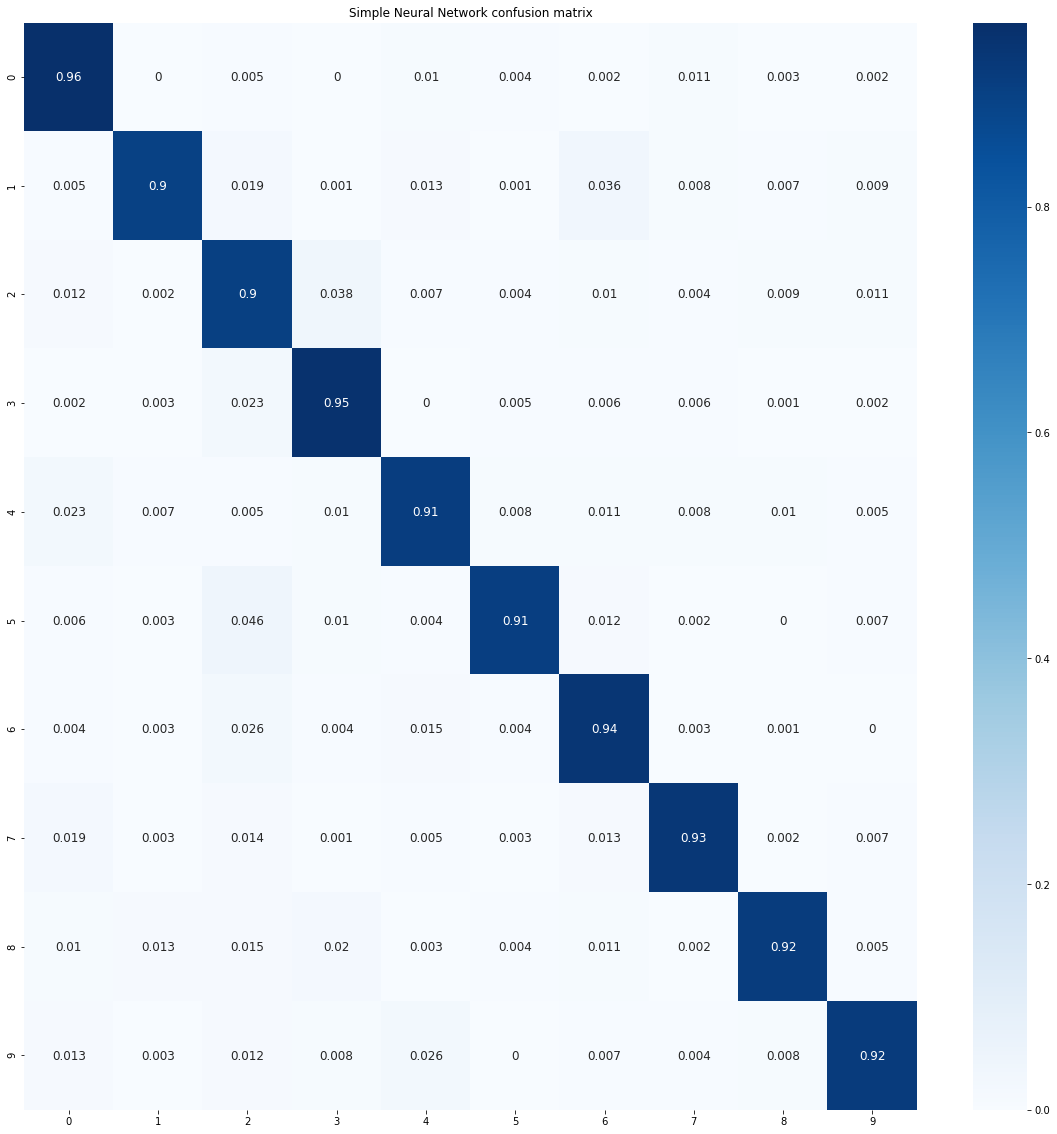

In [10]:

snn_prediction = snn_model.predict(x_test_normalized)

fig, axes = plt.subplots(figsize=(20,20))

print(metrics.classification_report(labels_test, np.argmax(snn_prediction, axis=1)))

snn_cfm = metrics.confusion_matrix(labels_test, np.argmax(snn_prediction, axis=1), normalize='true')
snn_cfm_tp = pd.DataFrame(snn_cfm, range(10),range(10))
sn.heatmap(snn_cfm_tp, annot=True,annot_kws={"size": 12}, cmap=plt.cm.Blues).set_title("Simple Neural Network confusion matrix")


7. Convolutional Neural Network

(60000, 28, 28, 1)
(28, 28, 1)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPoo

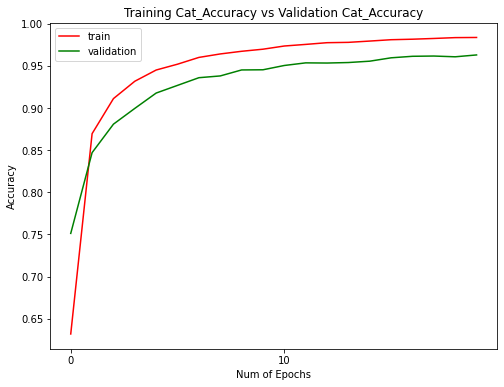

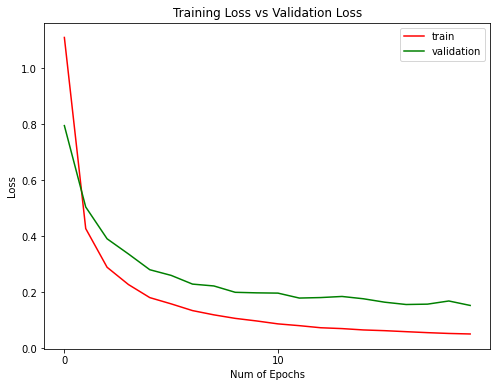

In [11]:
x_train_normalized = x_train / 255
x_test_normalized = x_test / 255

x_train_normalized = x_train_normalized.reshape(x_train_normalized.shape[0], images_train[0].shape[0], images_train[0].shape[1], 1)
x_test_normalized = x_test_normalized.reshape(x_test_normalized.shape[0], images_test[0].shape[0], images_test[0].shape[1], 1)
input_shape = (images_train[0].shape[0], images_train[0].shape[1], 1)
print(x_train_normalized.shape)
print(input_shape)
y_train = keras.utils.to_categorical(labels_train, 10)
y_test = keras.utils.to_categorical(labels_test, 10)

cnn_model = Sequential()

cnn_model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))
cnn_model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(10, activation='softmax'))

cnn_model.summary()

cnn_model.compile(loss='categorical_crossentropy', optimizer=adam(), metrics=['accuracy'])

n_epochs = 20
cnn_history = cnn_model.fit(x_train_normalized, y_train, batch_size=1000, epochs=n_epochs, verbose=True, validation_data=(x_test_normalized, y_test))
print(cnn_model.evaluate(x_test_normalized, y_test))

plt.figure(0)
plt.plot(cnn_history.history['accuracy'], 'r')
plt.plot(cnn_history.history['val_accuracy'],'g')
plt.xticks(np.arange(0, n_epochs, 10.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Cat_Accuracy vs Validation Cat_Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(cnn_history.history['loss'],'r')
plt.plot(cnn_history.history['val_loss'],'g')
plt.xticks(np.arange(0, n_epochs, 10.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1000
           1       0.98      0.93      0.95      1000
           2       0.95      0.93      0.94      1000
           3       0.96      0.99      0.97      1000
           4       0.95      0.95      0.95      1000
           5       0.98      0.96      0.97      1000
           6       0.92      0.98      0.95      1000
           7       0.99      0.97      0.98      1000
           8       0.97      0.99      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



Text(0.5, 1.0, 'Convolutional Neural Network confusion matrix')

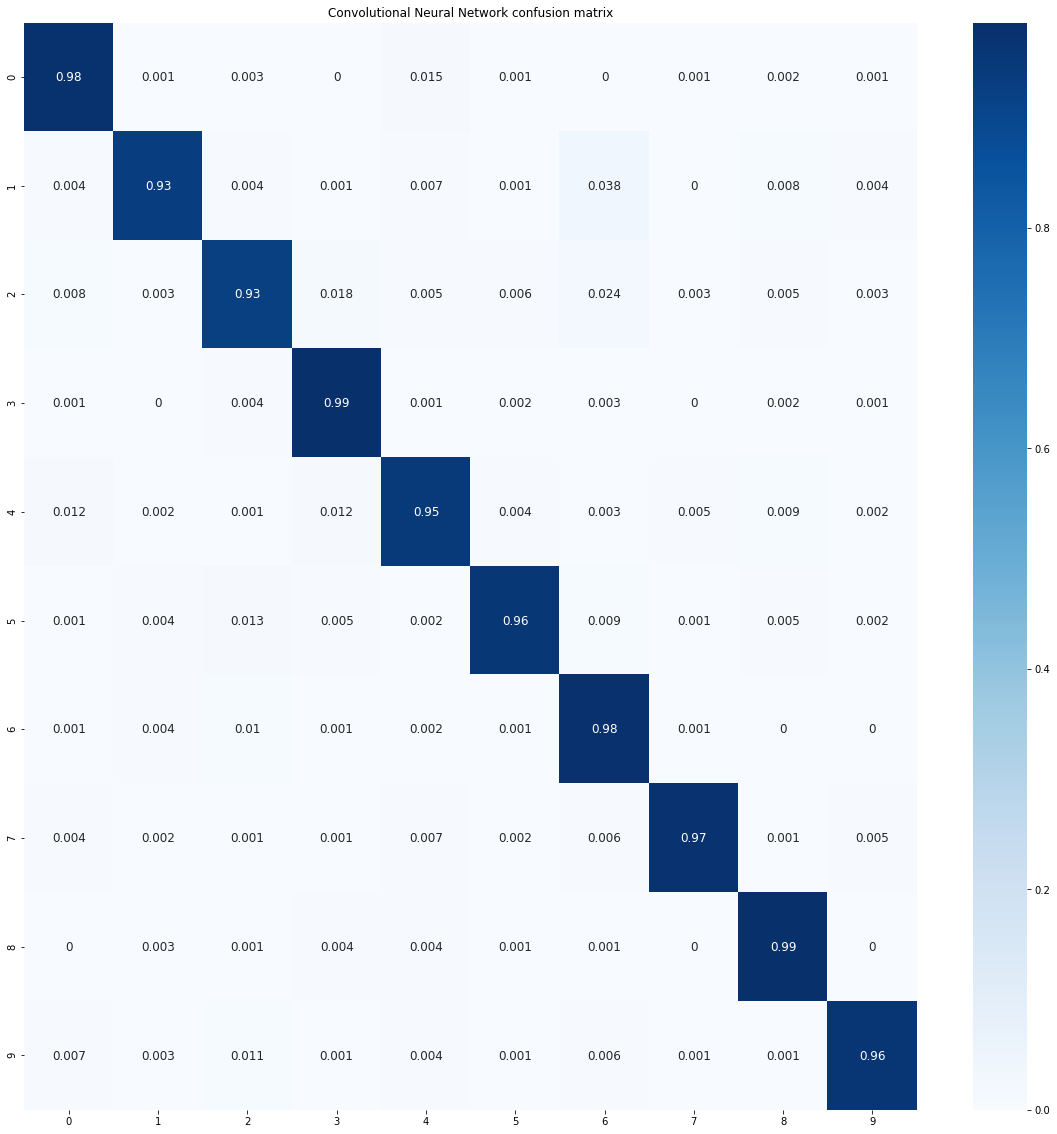

In [12]:
cnn_prediction = cnn_model.predict(x_test_normalized)

fig, axes = plt.subplots(figsize=(20,20))

print(metrics.classification_report(labels_test, np.argmax(cnn_prediction, axis=1)))

cnn_cfm = metrics.confusion_matrix(labels_test, np.argmax(cnn_prediction, axis=1), normalize='true')
cnn_cfm_tp = pd.DataFrame(cnn_cfm, range(10),range(10))
sn.heatmap(cnn_cfm_tp, annot=True,annot_kws={"size": 12}, cmap=plt.cm.Blues).set_title("Convolutional Neural Network confusion matrix")